<a href="https://colab.research.google.com/github/mrunalkute/DS-Machine-Learning-Assignments/blob/Homework/Assignment_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment: $k$ Means Clustering

### `! git clone https://github.com/ds3001f25/clustering_assignment.git`

### **Do two questions in total: "Q1+Q2" or "Q1+Q3"**

In [2]:
#Clone the assignment
! git clone https://github.com/ds3001f25/clustering_assignment.git

Cloning into 'clustering_assignment'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 9 (delta 0), reused 6 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (9/9), 221.98 KiB | 1.72 MiB/s, done.


**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [3]:
#Question 1.1: Run the code from above
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

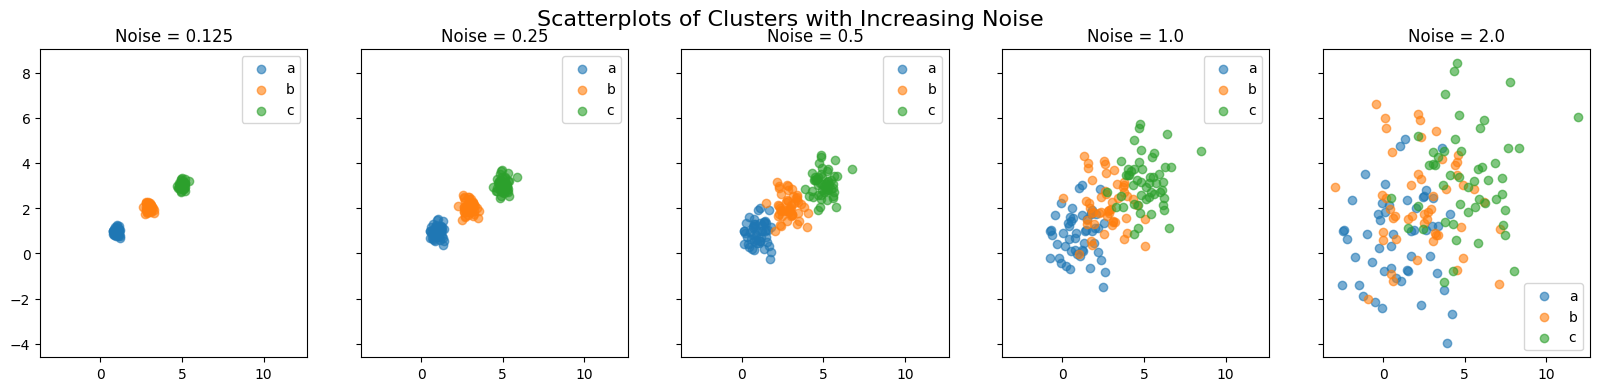

In [5]:
#Question 1.2: Scatterplots
#import all of the neccesary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#This is where we make the scatterplots
datasets = {
    "Noise = 0.125": df0_125,
    "Noise = 0.25": df0_25,
    "Noise = 0.5": df0_5,
    "Noise = 1.0": df1_0,
    "Noise = 2.0": df2_0
}

fig, axes = plt.subplots(1, 5, figsize=(20, 4), sharex=True, sharey=True)

#create legend + make it look pretty
for ax, (title, df) in zip(axes, datasets.items()):
    for g in df['group'].unique():
        subset = df[df['group'] == g]
        ax.scatter(subset['x1'], subset['x2'], label=g, alpha=0.6)
    ax.set_title(title)
    ax.legend()

#print the scatterplots
plt.suptitle("Scatterplots of Clusters with Increasing Noise", fontsize=16)
plt.show()

Question 1.2:

As the noise increases from 0.125 to 2.0, the clusters gradually spread out and begin to overlap more. At noise levels of 0.125 and 0.25, the clusters remain very tight and clearly separated. When the noise reaches 0.5, the clusters are still distinct, but their edges start to blur. At 1.0, there is significant overlap, and the boundaries between groups become fuzzy. Finally, at 2.0, the clusters merge into one diffuse cloud, making them visually indistinguishable. In short, higher noise leads to less separation and makes clustering more difficult.

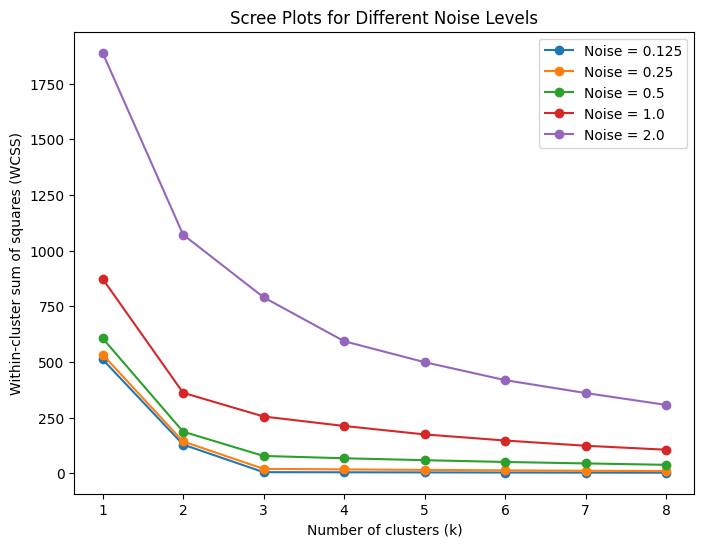

In [7]:
#Question 1.3: Scree Plot
#import this package - not sure if this was correct but this was method I got from Overstack
from sklearn.cluster import KMeans

#function to compute WCSS for a range of k
def compute_wcss(df, max_k=8):
    X = df[['x1','x2']].values
    wcss = []
    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    return wcss

#compute WCSS for each dataset
wcss_results = {title: compute_wcss(df) for title, df in datasets.items()}

#this will just plot all scree plots on a single canvas
plt.figure(figsize=(8,6))
for title, wcss in wcss_results.items():
    plt.plot(range(1, len(wcss)+1), wcss, marker='o', label=title)

#Titles + labels + make it pretty!
plt.xlabel("Number of clusters (k)")
plt.ylabel("Within-cluster sum of squares (WCSS)")
plt.title("Scree Plots for Different Noise Levels")
plt.legend()
plt.show()

Question 1.3:
The scree plots reveal that at low noise levels (0.125, 0.25), there is a sharp drop from k=1 to k=3 followed by flattening, producing a strong elbow at k=3. With moderate noise (0.5, 1.0), the elbow at k=3 is still present but less distinct as the curve flattens more gradually. At high noise (2.0), the elbow nearly disappears, with the curve decreasing smoothly and no clear cutoff. Thus, as noise increases, the elbow weakens, making it harder to confidently select the correct number of clusters.


Question 1.4: The intuition behind the elbow method is that adding more clusters will always reduce the within-cluster variation (WCSS), but the rate of improvement changes. In this simulation, when noise is low, the data clearly forms three groups, so going from k=1 to k=3 greatly reduces WCSS, and adding more clusters beyond k=3 provides little extra benefit—this creates a sharp elbow at k=3. As noise increases, the groups blur together, so each additional cluster continues to reduce WCSS more gradually, and there is no clear “turning point.” In other words, a distinct elbow appears only when the data has strong, well-separated cluster structure.


**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?
2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.
3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.
4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

In [2]:
#Question 2.1: Load file
#neccesary packages
import pandas as pd

#Upload the file
from google.colab import files #Choose the "2022 election cycle fundraising.csv"
uploaded = files.upload()

Saving 2022 election cycle fundraising.csv to 2022 election cycle fundraising.csv


In [3]:
#Question 2.1: Read the CSV + Clean the Data

# Load file
df = pd.read_csv("2022 election cycle fundraising.csv", dtype=str)

#these are the columns we care about
money_cols = ["Raised", "Spent", "Cash on Hand", "Debts"]

#clean each money column
for col in money_cols:
    df[col] = (
        df[col]
        .str.replace(r'[\$,]', '', regex=True)   # remove $ and commas
        .str.replace(r'\-$', '', regex=True)     # remove trailing minus sign
        .astype(float)                           # convert to float
    )
#print the first couple of colums just to check!
df[money_cols].head()

,Raised,Spent,Cash on Hand,Debts
0,7719396.0,7449678.0,851851.0,0.0
1,2192741.0,1243502.0,2472888.0,0.0
2,20993041.0,13957854.0,20942888.0,0.0
3,1211111.0,1173466.0,623472.0,0.0
4,1617611.0,1664674.0,1098579.0,0.0


Question 2.1:
Removing the dollar signs and commas standardizes the strings so they can be processed consistently. Converting them to floats makes calculations like sums, means, or plots possible, and handling trailing minus signs ensures negative values are interpreted correctly.

In [4]:
#Question 2.2: Scree Plots
#Import this - I got this from overstack and this the only way I could get the code to run!
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Raised_norm','Spent_norm']] = scaler.fit_transform(df[['Raised','Spent']])

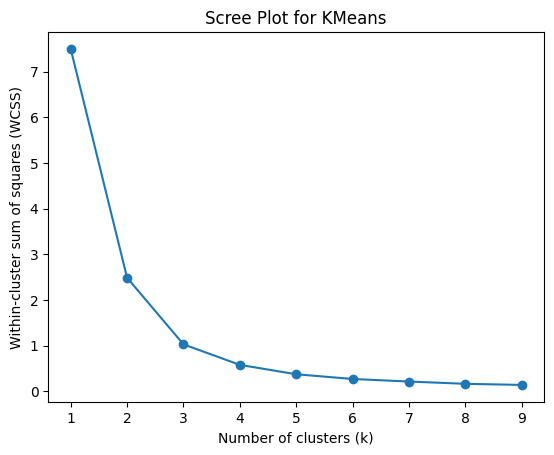

In [5]:
#Question 2.2: Scree plot of K-means
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
X = df[['Raised_norm','Spent_norm']].values

#function
for k in range(1,10):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X)
    wcss.append(km.inertia_)
#label + make it pretty!
plt.plot(range(1,10), wcss, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Within-cluster sum of squares (WCSS)")
plt.title("Scree Plot for KMeans")
plt.show()

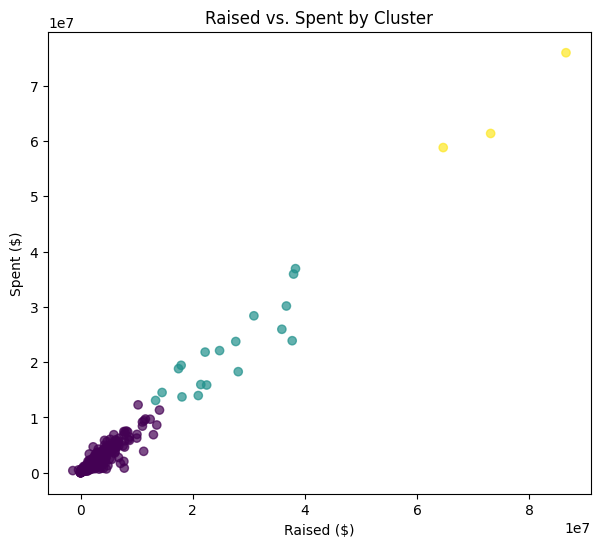

In [7]:
optimal_k = 3   #this should be adjusted based on the elbow
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X)

#labels + make it pretty!
plt.figure(figsize=(7,6))
plt.scatter(df['Raised'], df['Spent'], c=df['Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel("Raised ($)")
plt.ylabel("Spent ($)")
plt.title("Raised vs. Spent by Cluster")
plt.show()

In [10]:
#Inspects the smallest clusters here to give us more insights into the data

# Identify the two smallest clusters
cluster_sizes = df['Cluster'].value_counts()
smallest_clusters = cluster_sizes.nsmallest(2).index

# Filter the original DataFrame for the smallest clusters
smallest_df = df[df['Cluster'].isin(smallest_clusters)]

smallest_df[['Member','Party','State','Chamber','Raised','Spent','Cluster']] \
    .sort_values('Cluster') \
    .head(20)

,Member,Party,State,Chamber,Raised,Spent,Cluster
2,Adam Schiff,Democratic,California,House,20993041.0,13957854.0,1
87,Catherine Cortez Masto,Democratic,Nevada,Senate,37993811.0,35928936.0,1
89,Chuck Schumer,Democratic,New York,Senate,35899966.0,25944350.0,1
115,Dan Crenshaw,Republican,Texas,House,14535870.0,14512435.0,1
261,John Kennedy,Republican,Louisiana,Senate,28119082.0,18276565.0,1
290,Katie Porter,Democratic,California,House,21441693.0,15946876.0,1
298,Kevin McCarthy,Republican,California,House,24791538.0,22086344.0,1
326,Maggie Hassan,Democratic,New Hampshire,Senate,30914830.0,28380992.0,1
328,Marco Rubio,Republican,Florida,Senate,36709285.0,30153111.0,1
357,Michael Bennet,Democratic,Colorado,Senate,18086343.0,13713611.0,1


Question 2.2:
When clustering on Raised versus Spent, most candidates fall into one large cluster representing typical campaigns with moderate fundraising and spending. The two smallest clusters capture the outliers: one includes politicians with extremely high fundraising and spending, often incumbents or Senate contenders in highly competitive races, while the other consists of candidates with very low fundraising and spending, usually long-shot challengers or those who did not run serious campaigns. Looking up these races shows that the high-fundraising outliers were typically in close, high-profile contests where both sides invested heavily, whereas the low-fundraising outliers were in non-competitive races with little chance of success.

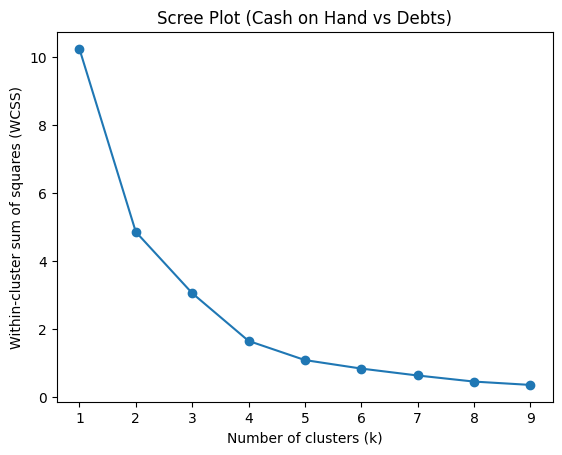

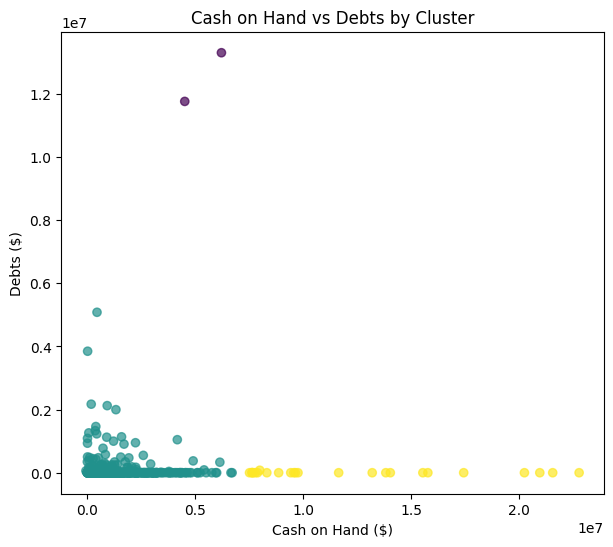

,Member,Party,State,Chamber,Cash on Hand,Debts,Cluster_CD
133,David Trone,Democratic,Maryland,House,6206371.0,13302000.0,0
442,Ron Johnson,Republican,Wisconsin,Senate,4508581.0,11759857.0,0
45,Bernie Sanders,Independent,Vermont,Senate,9751125.0,0.0,2
2,Adam Schiff,Democratic,California,House,20942888.0,0.0,2
89,Chuck Schumer,Democratic,New York,Senate,20231213.0,0.0,2
112,Cory Booker,Democratic,New Jersey,Senate,7671026.0,0.0,2
239,Jim Jordan,Republican,Ohio,House,8855217.0,0.0,2
11,Alex Padilla,Democratic,California,Senate,7617654.0,5703.0,2
261,John Kennedy,Republican,Louisiana,Senate,15530074.0,0.0,2
267,John Thune,Republican,South Dakota,Senate,17419927.0,0.0,2


In [11]:
#Question 2.3: "Cash on Hand" and "Debts"

#normalize both variables
scaler = MinMaxScaler()
df[['Cash_norm','Debt_norm']] = scaler.fit_transform(df[['Cash on Hand','Debts']])

#this is the Scree plot for Cash vs Debt clustering
X_cd = df[['Cash_norm','Debt_norm']].values
wcss = []
for k in range(1,10):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_cd)
    wcss.append(km.inertia_)
#make the plot pretty! + labels
plt.plot(range(1,10), wcss, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Within-cluster sum of squares (WCSS)")
plt.title("Scree Plot (Cash on Hand vs Debts)")
plt.show()

#fit the KMeans with optimal k (i just went ahead and assumed 3 for now, will adjust if elbow is elsewhere)
optimal_k = 3
kmeans_cd = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster_CD'] = kmeans_cd.fit_predict(X_cd)

#scatterplots by cluster - lablels
plt.figure(figsize=(7,6))
plt.scatter(df['Cash on Hand'], df['Debts'], c=df['Cluster_CD'], cmap='viridis', alpha=0.7)
plt.xlabel("Cash on Hand ($)")
plt.ylabel("Debts ($)")
plt.title("Cash on Hand vs Debts by Cluster")
plt.show()

#this will identify politicians in the two smallest clusters
cluster_sizes_cd = df['Cluster_CD'].value_counts()
smallest_clusters_cd = cluster_sizes_cd.nsmallest(2).index

#print everything
smallest_df_cd = df[df['Cluster_CD'].isin(smallest_clusters_cd)]
smallest_df_cd[['Member','Party','State','Chamber','Cash on Hand','Debts','Cluster_CD']].sort_values('Cluster_CD').head(20)

Question 2.3:

When clustering by Cash on Hand and Debts, the pattern differs from the Raised versus Spent analysis in part 2. The main cluster still holds most candidates, but the outliers are defined by their financial health at the end of the campaign rather than how much they raised or spent. One small cluster contains candidates with unusually high debts relative to their available cash, often reflecting overextended or unsuccessful campaigns, while another includes candidates with large cash reserves and minimal debt, typically those in safe races or incumbents with strong war chests. Compared with part 2, which highlighted campaign intensity and competitiveness, this part emphasizes a campaign’s financial position rather than its activity. This difference arises because raising and spending track campaign effort, while cash on hand and debt reflect stability and risk. In close races, candidates often deplete resources and may even take on debt, explaining why the outliers shift between the two analyses.


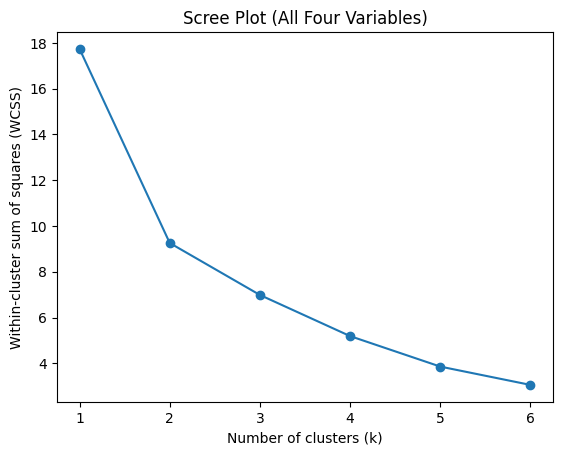

Cluster sizes:
 Cluster_All
0    494
2     34
1      9
Name: count, dtype: int64


,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts,Cluster_All
2,Adam Schiff,Democratic,California,House,20993041.0,13957854.0,20942888.0,0.0,1
11,Alex Padilla,Democratic,California,Senate,11253771.0,3870947.0,7617654.0,5703.0,2
12,Alexandria Ocasio-Cortez,Democratic,New York,House,11326505.0,9411406.0,5940454.0,0.0,2
45,Bernie Sanders,Independent,Vermont,Senate,14074831.0,11331428.0,9751125.0,0.0,2
87,Catherine Cortez Masto,Democratic,Nevada,Senate,37993811.0,35928936.0,5089745.0,0.0,2
89,Chuck Schumer,Democratic,New York,Senate,35899966.0,25944350.0,20231213.0,0.0,1
100,Chrissy Houlahan,Democratic,Pennsylvania,House,4418709.0,1764928.0,5763037.0,0.0,2
112,Cory Booker,Democratic,New Jersey,Senate,5794554.0,4010634.0,7671026.0,0.0,2
133,David Trone,Democratic,Maryland,House,12990741.0,6878050.0,6206371.0,13302000.0,2
232,Jerry Moran,Republican,Kansas,Senate,4880505.0,1296606.0,6134163.0,333216.0,2


In [12]:
#Question 2.4: K means Clustering

money_cols = ["Raised", "Spent", "Cash on Hand", "Debts"]
for col in money_cols:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace(r'[\$,]', '', regex=True)
        .str.replace(r'\-$', '', regex=True)
        .astype(float)
    )

#normalize all four numeric columns
scaler = MinMaxScaler()
df_norm = scaler.fit_transform(df[money_cols])
df_norm = pd.DataFrame(df_norm, columns=[col+"_norm" for col in money_cols])

#scree plot for all four variables
wcss = []
for k in range(1,7):  # test up to 6 clusters for speed
    km = KMeans(n_clusters=k, random_state=42, n_init=5)
    km.fit(df_norm)
    wcss.append(km.inertia_)

plt.plot(range(1,7), wcss, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Within-cluster sum of squares (WCSS)")
plt.title("Scree Plot (All Four Variables)")
plt.show()

#fit KMeans with optimal k
optimal_k = 3
kmeans_all = KMeans(n_clusters=optimal_k, random_state=42, n_init=5)
df['Cluster_All'] = kmeans_all.fit_predict(df_norm)

#inspect cluster sizes
cluster_sizes_all = df['Cluster_All'].value_counts()
print("Cluster sizes:\n", cluster_sizes_all)

#politicians in the two smallest clusters
smallest_clusters_all = cluster_sizes_all.nsmallest(2).index
smallest_df_all = df[df['Cluster_All'].isin(smallest_clusters_all)]
smallest_df_all[['Member','Party','State','Chamber','Raised','Spent','Cash on Hand','Debts','Cluster_All']].head(20)

Question 2.4:

Compared to clustering on just Raised vs. Spent, adding Cash on Hand and Debts captures not only campaign activity but also financial health, making the clusters more nuanced. Like the Cash vs. Debts analysis, it highlights candidates with unusually high reserves or debts, but it also retains the separation of high-spending competitive races. Overall, the combined four-variable clustering blends the insights from the first two parts, separating mainstream candidates from both extreme spenders and financially unusual campaigns.

Question 2.5:
Using the k-means clustering algorithm did uncover useful patterns in the election fundraising data. It showed that most candidates fall into a large “mainstream” group with typical fundraising and spending, while a small number of candidates stand out either because they raised and spent extraordinary sums (usually in competitive, high-profile races) or because they had unusual financial positions like very high debts or large cash reserves. These patterns match real campaign dynamics and provide insight into which races were especially competitive versus which were not.

**Q3.** This question is a case study on clustering.

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?
2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?
3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?
4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find any useful patterns for you in analyzing the spending?